# Phase II: Data Curation, Exploratory Analysis and Plotting (5\%)

### Team Members:
- Annalise Cowing
- Carly Thoms
- Caroline Monaco
- Chand Duggal


## Part 1:
(1%) Expresses the central motivation of the project and explains the (at least) two key questions to be explored. Gives a summary of the data processing pipeline so a technical expert can easily follow along.

### Problem Motivation
One of the most critical problems faced in our world today is that of climate change and global warming. Climate change is a well documented, evidence backed, worldwide problem. February 2024 was the hottest February on the record for the world as a whole (Sengupta & Erdenesanaa, 2024). Specific areas in the United States have also had their warmest winters on record in 2024, such as Minnesota, Wisconsin, Iowa, and Michigan (National Centers for Environment Information, 2024). Human induced climate change is already having drastic effects on the planet and is projected to only continue getting worse. Because the climate contains so many different elements, it can be complex to investigate direct relationships between each climate and weather.  For this project we have chosen two key questions in an attempt to analyze some of these relationships:
1. How do wind speed, humidity, and temperature interact to predict weather conditions? and
2. What is the relationship between increasing temperatures and humidity?

### Data Processing Pipeline
To gather our needed data, we will use the OpenWeather API. After the API is used to gather the data from OpenWeather, we will clean and process it. This involves selecting the necessary features from the raw data that will answer our questions. In this case, we select city, date and time, temperature, humidity, wind speed, and weather conditions. Temperature, humidity, and wind speed are numerical features to allow for ease of plotting and analysis. City, date and time, and weather condition are all categorical features. When pulling the date and time, we convert the raw data into DateTime objects. There are no NaN values within our dataset, so cleaning to remove those is not necessary. Once all the data is concatenated into a data frame, we can begin to create visualizations using Seaborn and Matplotlib. We will create visualizations to compare the temperature, humidity, and wind speed of each weather condition over time, as well as exploring temperature vs. humidity by city. These two graphs answer our key questions outlined above.

## Part 2:
(2\%) Obtains, cleans, and merges all data sources involved in the project.

In [ ]:
import requests
import pandas as pd
import time

In [ ]:
API_KEY = "d7528d366d47194c2a4b5166f0a479e3"

cities = ["Minneapolis", "Boston", "San Diego", "Madison", "Washington, D.C.", "Juneau", "Des Moines", "Detroit"]

url = "https://api.openweathermap.org/data/2.5/forecast"

weather_data = []

for city in cities:
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"
    }
    response = requests.get(url, params=params)
    data = response.json()

    forecasts = data["list"]

    for forecast in forecasts:
        date_time = forecast["dt_txt"]
        temp = forecast["main"]["temp"]
        humidity = forecast["main"]["humidity"]
        wind_speed = forecast["wind"]["speed"]
        weather_condition = forecast["weather"][0]["main"]

        weather_data.append({"City": city, "Date": date_time, "Temperature (°C)": temp, "Humidity (%)": humidity, "Wind Speed (m/s)": wind_speed, "Weather Condition": weather_condition})

df = pd.DataFrame(weather_data)
df

,City,Date,Temperature (°C),Humidity (%),Wind Speed (m/s),Weather Condition
0,Minneapolis,2025-02-26 00:00:00,9.03,54,2.75,Clouds
1,Minneapolis,2025-02-26 03:00:00,7.55,59,3.18,Clouds
2,Minneapolis,2025-02-26 06:00:00,5.64,72,2.99,Clouds
3,Minneapolis,2025-02-26 09:00:00,2.91,91,2.14,Clouds
4,Minneapolis,2025-02-26 12:00:00,2.20,90,2.46,Clouds
...,...,...,...,...,...,...
315,Detroit,2025-03-02 09:00:00,-6.71,46,2.64,Clouds
316,Detroit,2025-03-02 12:00:00,-6.84,51,2.03,Clouds
317,Detroit,2025-03-02 15:00:00,-4.88,44,2.75,Clear
318,Detroit,2025-03-02 18:00:00,-1.71,32,3.08,Clouds


## Part 3:
Builds at least two visualizations (graphs/plots) from the data which help to understand or answer the questions of interest. These visualizations will be graded based on how much information they can effectively communicate to readers. Please make sure your visualization are sufficiently distinct from each other. (Chand)

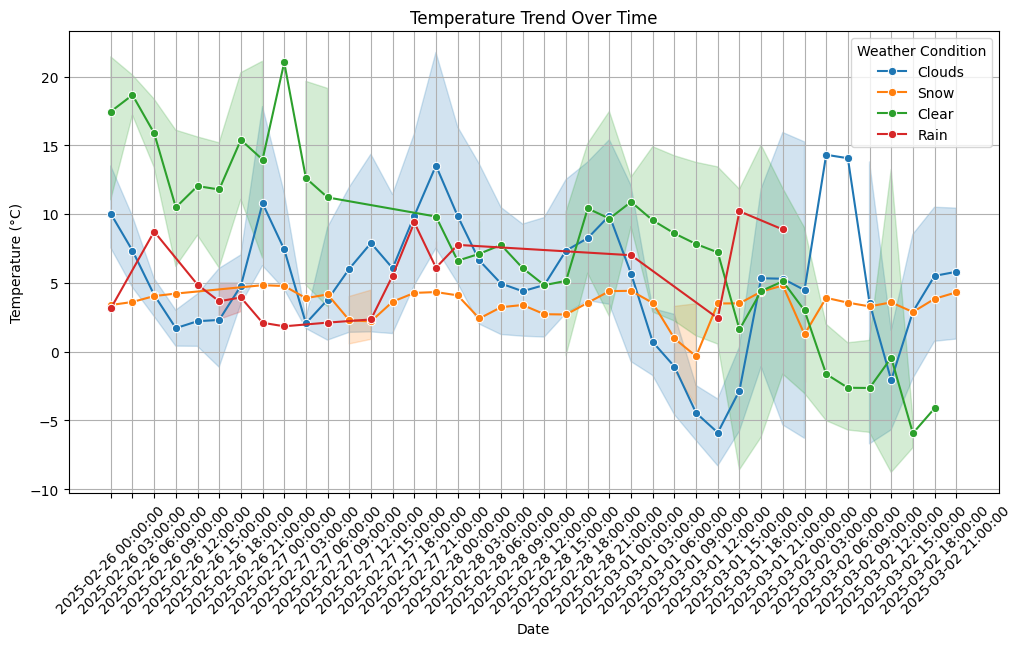

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Temperature (°C)", hue="Weather Condition", marker="o")

# create title and axes
plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.legend(title="Weather Condition")
plt.grid(True)
plt.show()

This graph depicts the temperature levels of each weather condition over time. We are able to see which weather conditions have heightened/lessened temperatures and analyze our first key question. We are able to see how temperature relates to each weather condition.

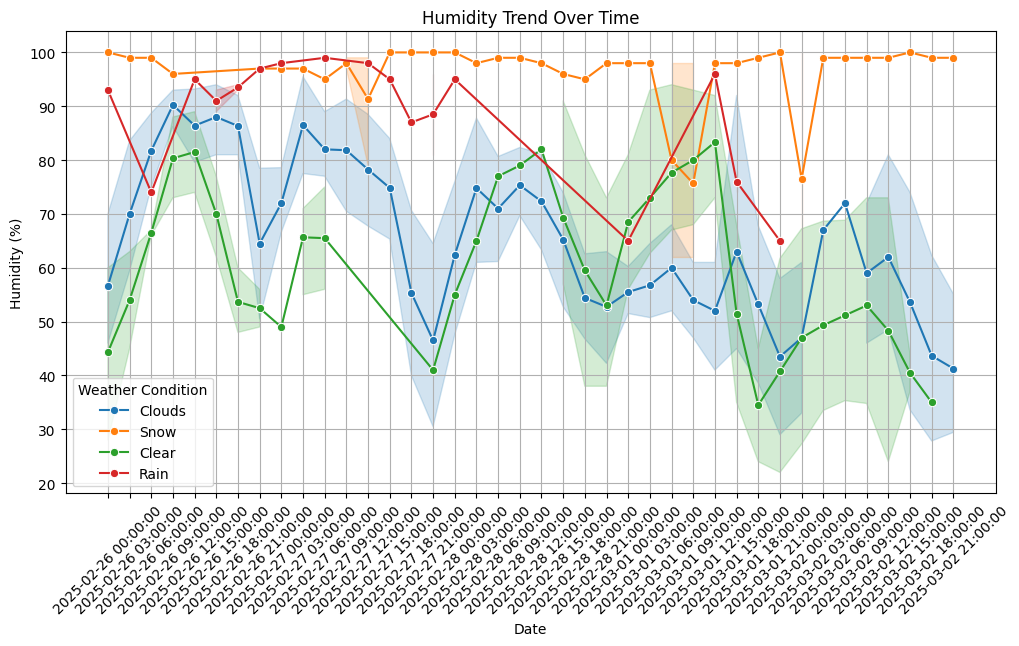

In [ ]:
# create plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Humidity (%)", hue="Weather Condition", marker="o")

# create title and axes
plt.title("Humidity Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)
plt.legend(title="Weather Condition")
plt.grid(True)
plt.show()

This graph depicts the humidity levels of each weather condition over time. We are able to see which weather conditions have heightened/lessened humidity and analyze our first key question. We are able to see how humidity relates to each weather condition.

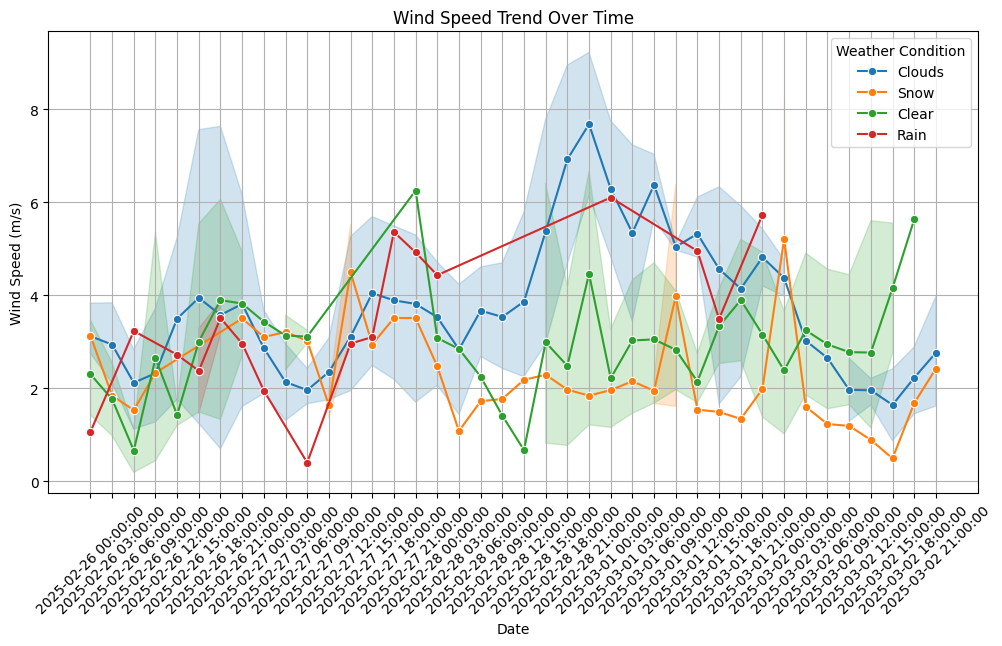

In [ ]:
# create plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Wind Speed (m/s)", hue="Weather Condition", marker="o")

# create title and axes
plt.title("Wind Speed Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.xticks(rotation=45)
plt.legend(title="Weather Condition")
plt.grid(True)
plt.show()

This graph depicts the wind speed levels of each weather condition over time. We are able to see which weather conditions have heightened/lessened wind speeds and analyze our first key question. We are able to see how wind speed relates to each weather condition.

<ipython-input-7-3b0a74c30ed1>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cities))


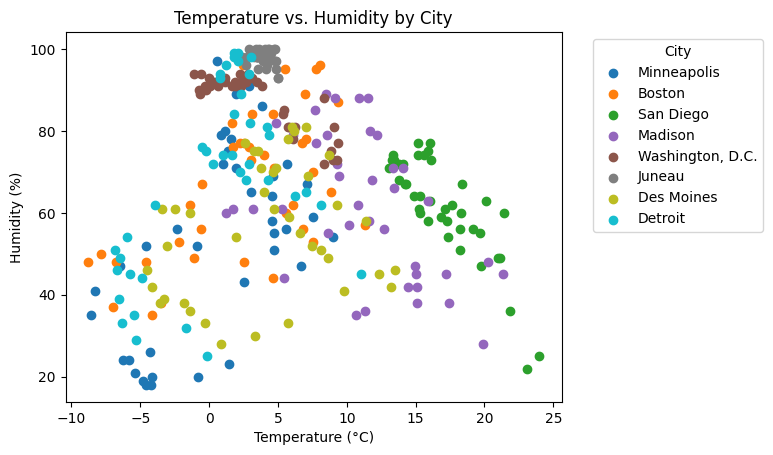

In [ ]:
cities = df['City'].unique()
colors = plt.cm.get_cmap('tab10', len(cities))

for i, city in enumerate(cities):
    city_data = df[df['City'] == city]
    plt.scatter(city_data['Temperature (°C)'], city_data['Humidity (%)'],
                label = city, color = colors(i), marker = 'o')

plt.title('Temperature vs. Humidity by City')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')

plt.legend(title = 'City', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

This visualization enables the second question - what is the relationship between temperature and humidity - to be investigated. The graph plots humidity by temperature and colors each dot by each city in the dataset. We can observe that there is not much of a correlation between the two variables, and certain cities have a different grouping range (ex. Washington DC's values are mostly clustered together, while Detroit has a wider spread).